# Autoencoder

In [19]:
import numpy as np
import tensorflow as tf


In [20]:
X = np.eye(8).astype(np.float32)
# eye = identity matrix
print(X)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [21]:
# 8 - 3 - 8
inputs = tf.keras.Input(shape=X.shape[1]) # 8 
encoder = tf.keras.layers.Dense(3, activation='sigmoid') # 3 
decoder = tf.keras.layers.Dense(X.shape[1], activation='sigmoid') # 8
outputs = decoder(encoder(inputs))
model = tf.keras.Model(inputs, outputs)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=3.5))


In [22]:
model.fit(X, X, epochs=5000, verbose=0)


ผลการ Encode </br>
มันจะ encode ออกมาเป็นเลขฐาน 2  0-7 เองโดยไม่เรียงลำดับให้

In [23]:
np.round(encoder(X))
# มันจะ encode ออกมาเป็นเลขฐาน 2  0-7 เองโดยไม่เรียงลำดับให้

array([[1., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]], dtype=float32)

In [24]:
model.predict(X)

array([[8.40235412e-01, 7.59654431e-05, 1.16917966e-02, 4.40662960e-04,
        1.40179545e-05, 6.31941780e-02, 7.15050788e-04, 9.77304950e-02],
       [2.01193173e-03, 8.52793753e-01, 3.99336968e-05, 1.91352796e-03,
        7.83668160e-02, 6.00655116e-02, 2.90001370e-03, 1.66374311e-01],
       [1.14050329e-01, 4.29789498e-06, 8.61474514e-01, 2.29474306e-02,
        8.18577223e-03, 4.22637182e-04, 4.25354168e-02, 2.98257661e-03],
       [4.52466309e-03, 9.52962262e-04, 8.54431540e-02, 9.14941967e-01,
        5.75618222e-02, 8.12778324e-02, 2.73442984e-05, 1.78024478e-04],
       [2.31729733e-04, 8.81692097e-02, 2.00315136e-02, 6.64378703e-02,
        8.62841785e-01, 9.87697393e-04, 5.49876057e-02, 6.41717575e-03],
       [8.92912224e-02, 7.14172050e-02, 7.04773120e-05, 5.89306280e-02,
        2.34817475e-04, 8.91837299e-01, 1.55782971e-06, 1.64186191e-02],
       [2.09150314e-02, 1.09670451e-03, 1.29420832e-01, 1.31469467e-04,
        7.68206939e-02, 6.19635757e-05, 8.52223337e-01, 1.

In [25]:
Z = np.round(model(X))
print(Z)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


# Autoencoder as Feature Extractor

Encode with MLP

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
from matplotlib import pyplot as plt

(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()
X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0
X = X.reshape(-1, 28*28)
Xtest = Xtest.reshape(-1, 28*28)


In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

clf = SVC()
clf.fit(X, Y)
Z = clf.predict(Xtest)
print('accuracy rate=', accuracy_score(Ytest, Z))
print('confusion matrix:')
print(confusion_matrix(Ytest, Z))

accuracy rate= 0.9792
confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [3]:
# 784-392-196-98-196-392-784
inputs = Input(shape=X.shape[1])
en1 = tf.keras.layers.Dense(X.shape[1] // 2, activation='relu')
en2 = tf.keras.layers.Dense(X.shape[1] // 4, activation='relu')
en3 = tf.keras.layers.Dense(X.shape[1] // 8, activation='relu')

de1 = tf.keras.layers.Dense(X.shape[1] // 4, activation='relu')
de2 = tf.keras.layers.Dense(X.shape[1] // 2, activation='relu')
de3 = tf.keras.layers.Dense(X.shape[1], activation='relu')

outputs = de3(de2(de1(en3(en2(en1(inputs))))))
model = Model(inputs,outputs)


In [4]:
model.compile(loss=losses.MeanSquaredError(),
                optimizer=optimizers.SGD(learning_rate=0.1))

In [6]:
model.fit(X, X, epochs=200)


Epoch 1/200
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0804
Epoch 2/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0695
Epoch 3/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554
Epoch 4/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0475
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425
Epoch 6/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395
Epoch 7/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0373
Epoch 8/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0357
Epoch 9/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0343
Epoch 10/200
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0331
Epoch 11/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322
Epoch 12/200
1875/1875 [==============================] - 6s 3ms/step - lo

In [7]:
Xencoded = en3(en2(en1(X))).numpy()
print(Xencoded.shape)

(60000, 98)


In [9]:
clf1 = SVC()
clf1.fit(Xencoded, Y)
Xtestencoded = en3(en2(en1(Xtest))).numpy()
Z1 = clf1.predict(Xtestencoded)
print('accuracy rate=', accuracy_score(Ytest, Z1))
print('confusion matrix:')
print(confusion_matrix(Ytest, Z1))

accuracy rate= 0.9503
confusion matrix:
[[ 967    0    0    1    1    5    3    1    2    0]
 [   0 1123    3    2    0    1    2    1    3    0]
 [  11    1  977   11    6    1    7    9    9    0]
 [   1    0   15  955    0   11    1    8   15    4]
 [   2    0    8    0  940    0    7    1    1   23]
 [   6    2    2   29    7  821    7    3   11    4]
 [   9    4    3    0    4    8  928    0    2    0]
 [   1   11   21    3    6    1    0  964    3   18]
 [   5    3    5   14    8   20    6    6  903    4]
 [   8    4    2   13   35    3    1   12    6  925]]


# Autoencoder as Reconstructor

ใช้แต่ decoder

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
from matplotlib import pyplot as plt

In [ ]:
# 784-392-196-98-196-392-784
inputs = Input(shape=X.shape[1])
en1 = tf.keras.layers.Dense(X.shape[1] // 2, activation='relu')
en2 = tf.keras.layers.Dense(X.shape[1] // 4, activation='relu')
en3 = tf.keras.layers.Dense(X.shape[1] // 8, activation='relu')

de1 = tf.keras.layers.Dense(X.shape[1] // 4, activation='relu')
de2 = tf.keras.layers.Dense(X.shape[1] // 2, activation='relu')
de3 = tf.keras.layers.Dense(X.shape[1], activation='relu')

outputs = de3(de2(de1(en3(en2(en1(inputs))))))
model = Model(inputs,outputs)


<function matplotlib.pyplot.show(close=None, block=None)>

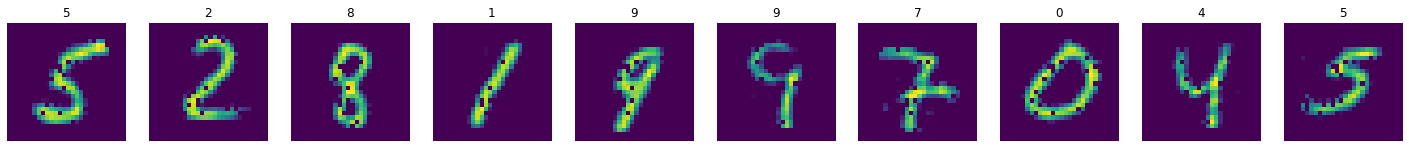

In [13]:
Xtestencoded = en3(en2(en1(Xtest))).numpy()
Recon = de3(de2(de1(Xtestencoded))).numpy()

n =10
plt.figure(figsize=(25,25))
for j,i in enumerate(np.random.randint(0,len(Recon),n)):
    plt.subplot(1,n,j+1)
    plt.imshow(Recon[i].reshape(28,28))
    plt.title(Ytest[i])
    plt.axis('off')
plt.show



ผสมระหว่าง 8 4 โดยวิธีการ cross over


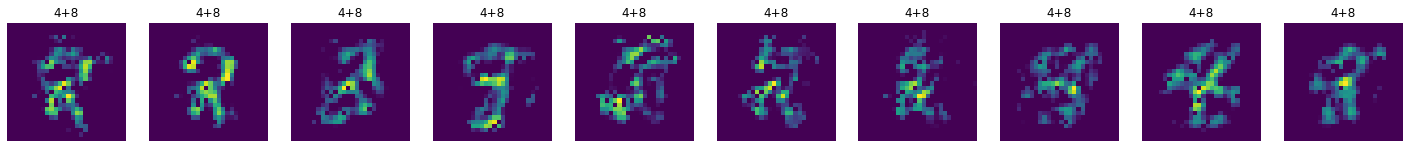

In [16]:
p = [4,8]
p1 = np.where(Ytest == p[0])[0]
p2 = np.where(Ytest == p[1])[0]
n = 10
plt.figure(figsize = (25,25))
for i in range(n):
    temp  =Xtestencoded[[np.random.choice(p1),np.random.choice(p2)]]
    x = np.hstack((temp[0,:temp.shape[1]//2],
                    temp[1,temp.shape[1]//2:])).reshape(1,temp.shape[1])
    Recon = de3(de2(de1(x))).numpy()
    Recon = Recon.reshape((len(Recon),28,28))[0]
    plt.subplot(1,n,i+1)
    plt.imshow(Recon)
    plt.title(str(p[0])+'+'+str(p[1]))
    plt.axis('off')
plt.show()


# Autoencoder with CNN

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, Input, layers, losses, optimizers, datasets
from matplotlib import pyplot as plt

(X, Y), (Xtest, Ytest) = datasets.mnist.load_data()

X = X.astype(np.float32) / 255.0
Xtest = Xtest.astype(np.float32) / 255.0

In [2]:
inputs = Input(shape=(*X.shape[1:], 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = Model(inputs, encoded, name='encoder')

encoded_inputs = Input(shape=encoded.shape[1:])
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_inputs)
x = layers.UpSampling2D((2, 2))(x) # จาก 2*2 => 4*4
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(encoded_inputs, decoded, name='decoder')

model = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
model.compile(optimizer='sgd', loss='mse')

In [3]:
model.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 4, 4, 8)           1904      
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X[:,:,:,None], X[:,:,:,None], epochs=50)

Epoch 1/50
1875/1875 [==============================] - 21s 8ms/step - loss: 0.1058: 0s
Epoch 2/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0576
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0494
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0454
Epoch 5/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0428
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0409
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0394: 0s
Epoch 8/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0382
Epoch 9/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0372
Epoch 10/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0363
Epoch 11/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0355
Epoch 12/50
1875/1875 [==============================] - 14s 7ms/s

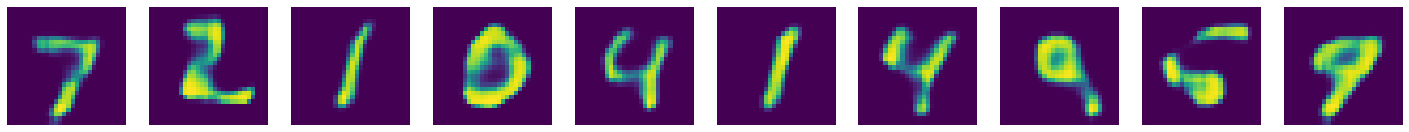

In [5]:
Z = model(Xtest)
n = 10
plt.figure(figsize=(25, 25))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(Z[i][:,:,0])
  plt.axis('off')
plt.show()

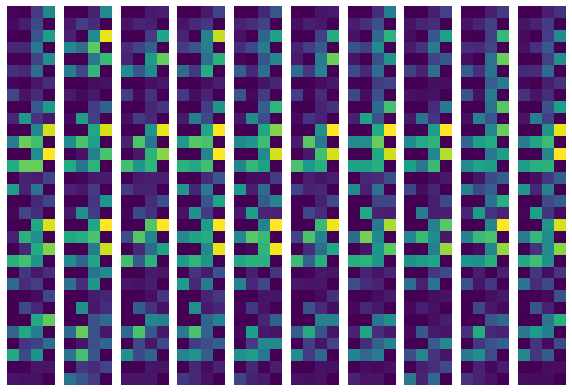

In [6]:
Z = encoder(Xtest)
n = 10
plt.figure(figsize=(10, 10))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(Z[i].numpy().reshape(32, -1))
  plt.axis('off')
plt.show()